In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report

In [3]:
data=pd.read_csv(r"C:\Users\dell\Desktop\MyDocs\Docs\MK\blood.csv")
data

,V1,V2,V3,V4,Class
0,2,50,12500,98,2
1,0,13,3250,28,2
2,1,16,4000,35,2
3,2,20,5000,45,2
4,1,24,6000,77,1
...,...,...,...,...,...
743,23,2,500,38,1
744,21,2,500,52,1
745,23,3,750,62,1
746,39,1,250,39,1


In [4]:
data.shape

(748, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   V1      748 non-null    int64
 1   V2      748 non-null    int64
 2   V3      748 non-null    int64
 3   V4      748 non-null    int64
 4   Class   748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [6]:
data.isnull().sum()

V1       0
V2       0
V3       0
V4       0
Class    0
dtype: int64

In [7]:
data.duplicated().sum()

215

In [8]:
data=data.drop_duplicates()

In [9]:
data.describe()

,V1,V2,V3,V4,Class
count,533.000000,533.000000,533.000000,533.000000,533.00000
mean,9.529081,6.990619,1747.654784,42.303940,1.27955
std,8.250860,6.265875,1566.468760,23.295291,0.44920
min,0.000000,1.000000,250.000000,2.000000,1.00000
25%,3.000000,3.000000,750.000000,26.000000,1.00000
50%,8.000000,5.000000,1250.000000,38.000000,1.00000
75%,14.000000,9.000000,2250.000000,58.000000,2.00000
max,74.000000,50.000000,12500.000000,98.000000,2.00000


C:\Users\dell\AppData\Local\Temp\ipykernel_15132\3419591898.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.hist(ax=ax)


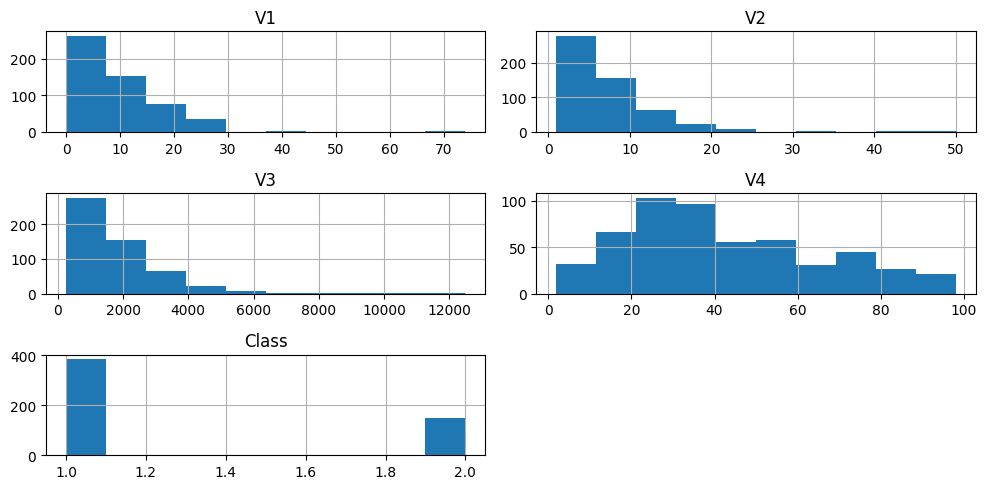

In [10]:
fig,ax=plt.subplots(figsize=(10,5))
data.hist(ax=ax)
plt.tight_layout()
plt.show()

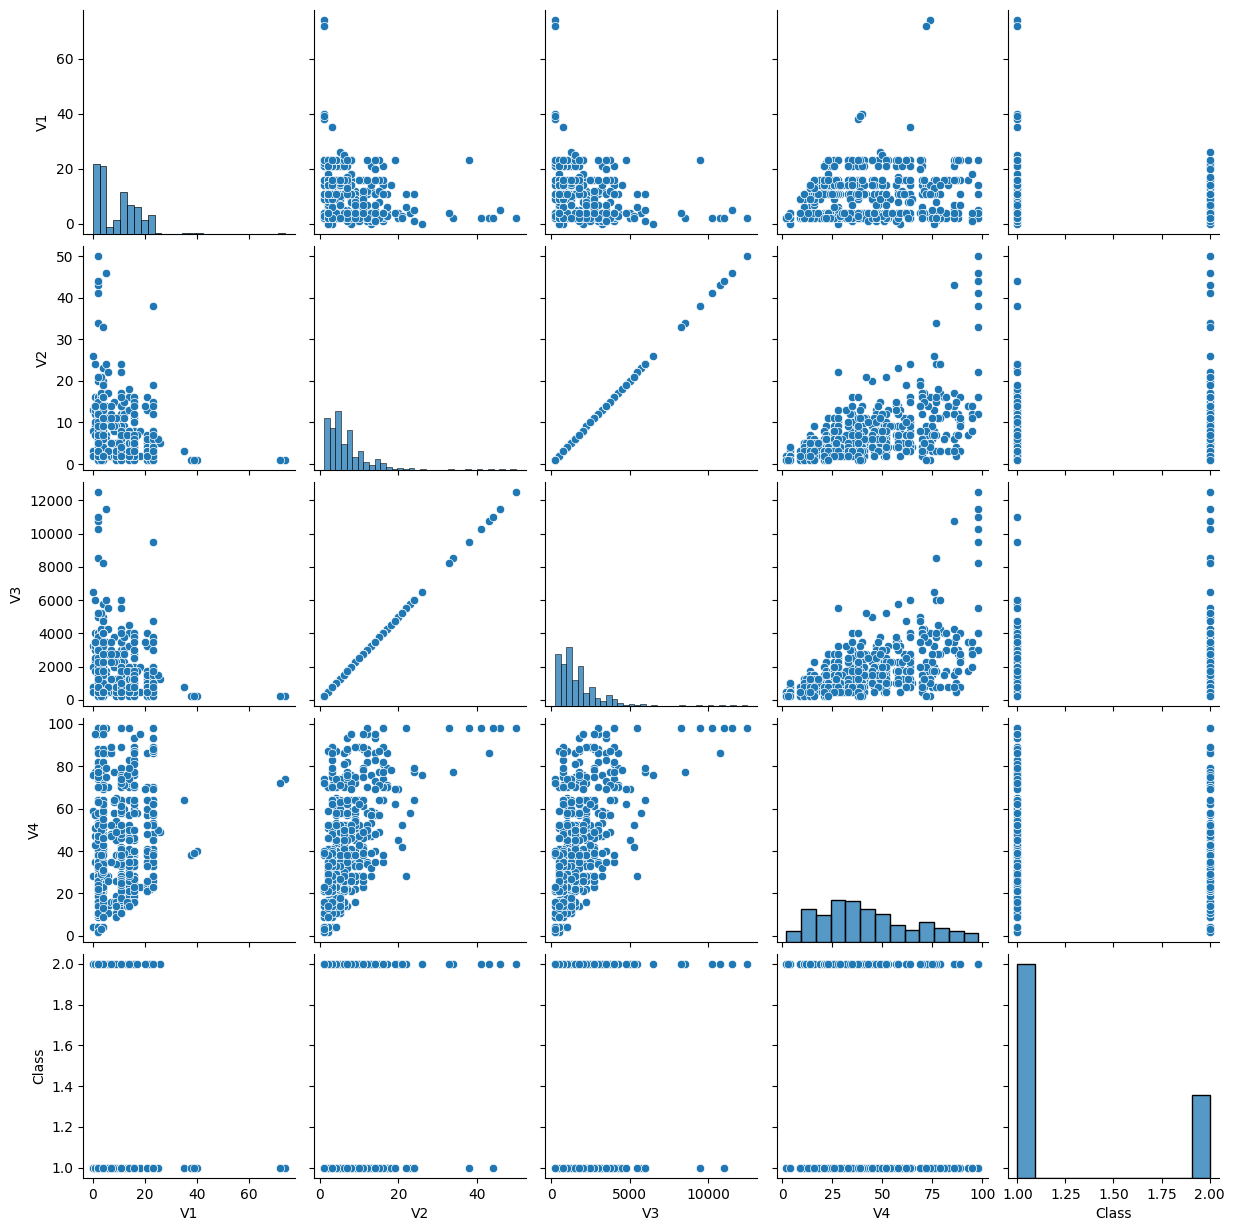

In [11]:
sns.pairplot(data)

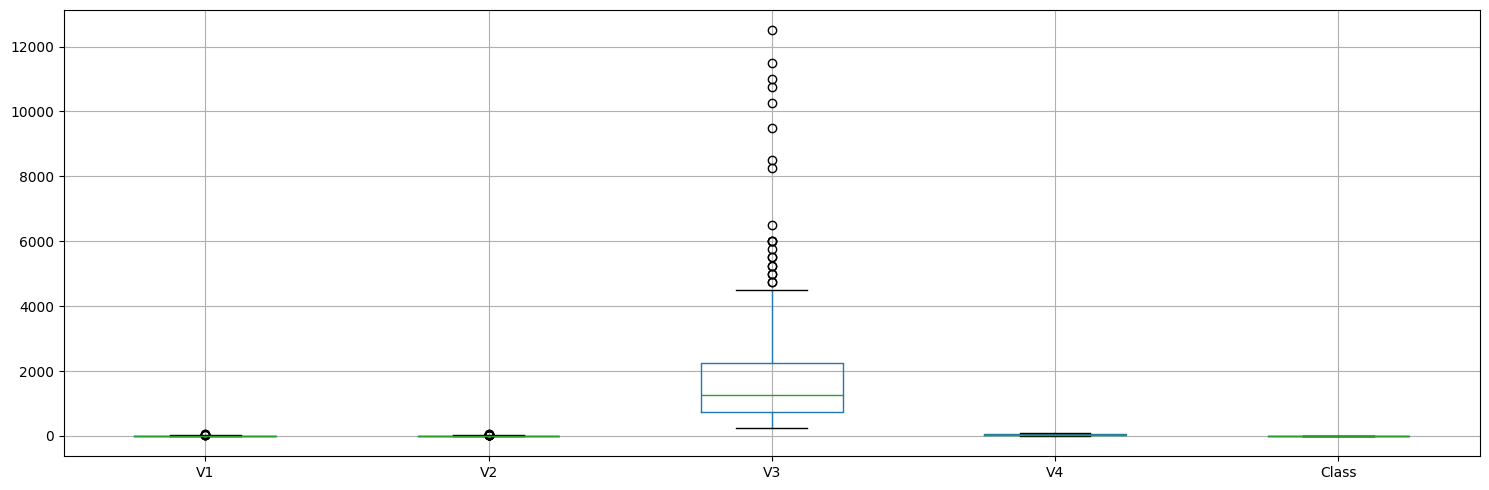

In [12]:
fig,ax=plt.subplots(figsize=(15,5))
data.boxplot(ax=ax)
plt.tight_layout()
plt.show()

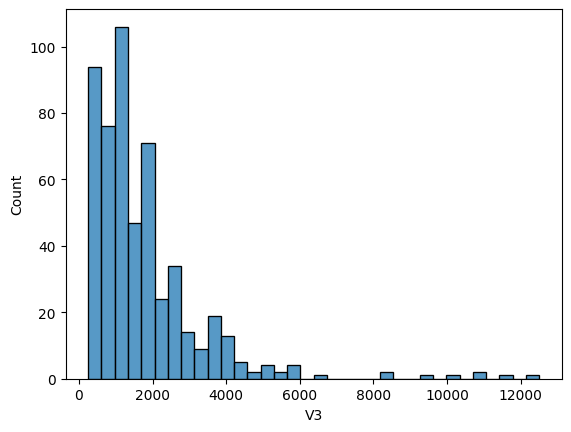

In [13]:
sns.histplot(x=data["V3"])
plt.show()

In [14]:
ind=data[data["V3"]>4000].index
ind

Index([  0,   3,   4,   9,  10,  44,  55,  72,  96, 105, 115, 241, 243, 278,
       341, 500, 501, 502, 503, 504, 505, 506, 508, 517, 528, 677],
      dtype='int64')

In [15]:
specific_point=data["V3"][3]
specific_point

5000

In [16]:
specific_z = (specific_point - data["V3"].mean()) / data["V3"].std()
specific_z

2.076227307104726

In [17]:
from scipy.stats import zscore
threshold = specific_z  
z_scores = zscore(data["V3"])
outliers_mask = abs(z_scores) > threshold

# Remove rows with outliers
data_no_outliers = data[~outliers_mask]

In [18]:
data_no_outliers

,V1,V2,V3,V4,Class
1,0,13,3250,28,2
2,1,16,4000,35,2
5,4,4,1000,4,1
6,2,7,1750,14,2
7,1,12,3000,35,1
...,...,...,...,...,...
743,23,2,500,38,1
744,21,2,500,52,1
745,23,3,750,62,1
746,39,1,250,39,1


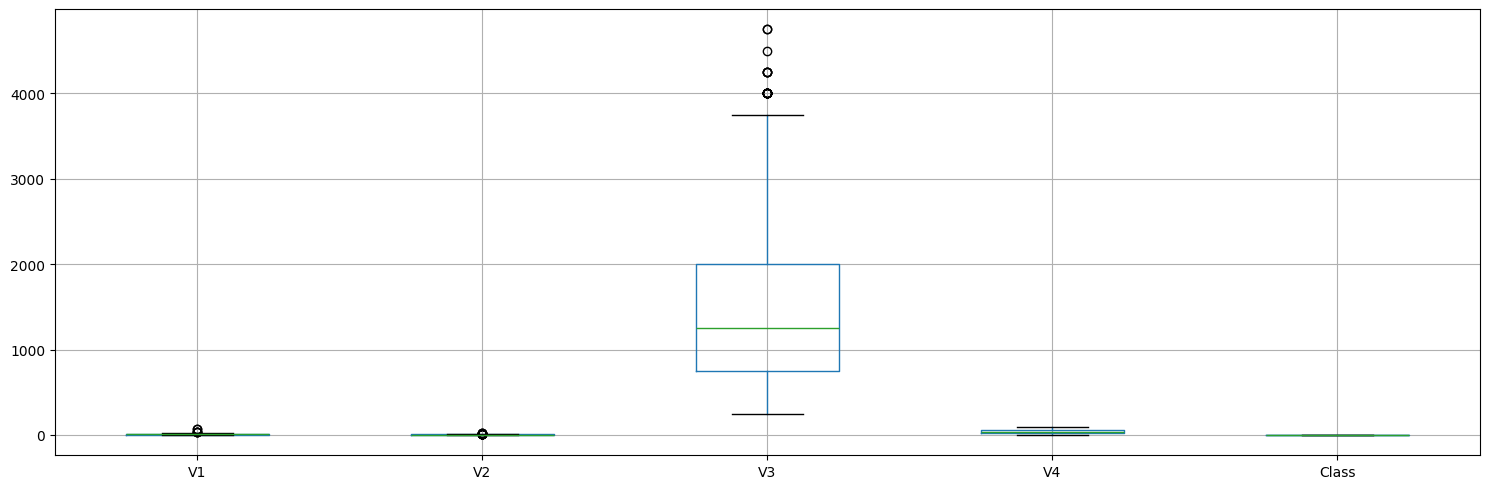

In [19]:
fig,ax=plt.subplots(figsize=(15,5))
data_no_outliers.boxplot(ax=ax)
plt.tight_layout()
plt.show()

In [20]:
data_no_outliers.corr()["Class"].sort_values() # the correlation between data and target isn't good at all but there are only 4 columns so i will not drop any one

V1      -0.257895
V4      -0.184210
V2       0.094757
V3       0.094757
Class    1.000000
Name: Class, dtype: float64

In [21]:
data_no_outliers["Class"].value_counts()

Class
1    377
2    137
Name: count, dtype: int64

In [22]:
feature=data_no_outliers.drop(["Class"],axis=1)
target=data_no_outliers["Class"]

In [23]:
SM=SMOTE()
X_SM_sampled,y_SM_sampled=SM.fit_resample(feature,target)

In [24]:
X_SM_sampled.shape,y_SM_sampled.shape

((754, 4), (754,))

In [25]:
y_SM_sampled.value_counts()

Class
2    377
1    377
Name: count, dtype: int64

In [26]:
x_train,x_test,y_train,y_test=train_test_split(X_SM_sampled,y_SM_sampled,test_size=0.2,random_state=100)

In [27]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [28]:
LR=LogisticRegression()
LR.fit(x_train_scaled,y_train)

LogisticRegression()

In [29]:
log_pred=LR.predict(x_test_scaled)

In [30]:
print(classification_report(y_test,log_pred))

              precision    recall  f1-score   support

           1       0.80      0.59      0.68        86
           2       0.60      0.80      0.68        65

    accuracy                           0.68       151
   macro avg       0.70      0.70      0.68       151
weighted avg       0.71      0.68      0.68       151



In [31]:
rfc=RandomForestClassifier(n_estimators=50,criterion="gini",max_depth=7)
rfc.fit(x_train_scaled,y_train)

RandomForestClassifier(max_depth=7, n_estimators=50)

In [32]:
rfc_pred=rfc.predict(x_test_scaled)

In [33]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           1       0.77      0.67      0.72        86
           2       0.63      0.74      0.68        65

    accuracy                           0.70       151
   macro avg       0.70      0.71      0.70       151
weighted avg       0.71      0.70      0.70       151



In [34]:
bagging=BaggingClassifier(rfc)
bagging.fit(x_train_scaled,y_train)

BaggingClassifier(estimator=RandomForestClassifier(max_depth=7,
                                                   n_estimators=50))

In [35]:
bagging_pred=bagging.predict(x_test_scaled)

In [36]:
print(classification_report(y_test,bagging_pred))

              precision    recall  f1-score   support

           1       0.79      0.65      0.71        86
           2       0.62      0.77      0.69        65

    accuracy                           0.70       151
   macro avg       0.71      0.71      0.70       151
weighted avg       0.72      0.70      0.70       151



In [37]:
from sklearn.ensemble import VotingClassifier
clf1=LogisticRegression()
clf2=RandomForestClassifier(n_estimators=50,criterion="gini",max_depth=7)
clf3=BaggingClassifier(rfc)

In [38]:
voting_clf=VotingClassifier(estimators=[("rfc",clf2),("LR",clf1),("baging",clf3)])

In [39]:
voting_clf.fit(x_train_scaled,y_train)
predictions=voting_clf.predict(x_test_scaled)

In [40]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.77      0.64      0.70        86
           2       0.61      0.75      0.68        65

    accuracy                           0.69       151
   macro avg       0.69      0.70      0.69       151
weighted avg       0.70      0.69      0.69       151



In [41]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [42]:
classifier={
    "Random Forest Classifier":RandomForestClassifier(),
    "Ada Boost Classifier":AdaBoostClassifier(),
    "Decision Tree Classifier":DecisionTreeClassifier(),
    "Naive Bayes":GaussianNB()
}

In [43]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [44]:
for name,clf in classifier.items():
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    print(f"{name}")
    print(f"{accuracy*100}")
    print(classification_report(y_test,y_pred))
    print("-"*60)

Random Forest Classifier
68.87417218543047
              precision    recall  f1-score   support

           1       0.76      0.66      0.71        86
           2       0.62      0.72      0.67        65

    accuracy                           0.69       151
   macro avg       0.69      0.69      0.69       151
weighted avg       0.70      0.69      0.69       151

------------------------------------------------------------
Ada Boost Classifier
71.52317880794702
              precision    recall  f1-score   support

           1       0.79      0.69      0.73        86
           2       0.64      0.75      0.70        65

    accuracy                           0.72       151
   macro avg       0.72      0.72      0.71       151
weighted avg       0.73      0.72      0.72       151

------------------------------------------------------------
Decision Tree Classifier
62.913907284768214
              precision    recall  f1-score   support

           1       0.69      0.63      0.66

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
